In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder

In [18]:
#loading data
data = pd.read_csv('compresive_strength_concrete.csv')

In [19]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [20]:
data = shuffle(data)
df = data.values
df.shape

(1030, 9)

In [21]:
data.head()
#no missing values(NaN)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
511,424.0,22.0,132.0,178.0,8.5,822.0,750.0,56,65.70
1024,166.0,259.7,0.0,183.2,12.7,858.8,826.8,28,37.92
366,214.9,53.8,121.9,155.6,9.6,1014.3,780.6,28,52.20
1003,366.0,187.0,0.0,191.3,6.6,824.3,756.9,28,65.91
17,342.0,38.0,0.0,228.0,0.0,932.0,670.0,365,56.14


In [22]:
#input set
x = df[:,:8].astype('float32')
#output set
y = df[:,8].astype('float32')

In [23]:
x.shape

(1030, 8)

In [24]:
y.shape

(1030,)

In [25]:
#50 training
train_input = x[:515,:]
train_label = y[:515]
#30 testing
test_input = x[515:824,:]
test_label = y[515:824]
#20 validation
val_input = x[824:,:]
val_label = y[824:]

In [26]:
train_input.shape

(515, 8)

In [27]:
train_label.shape

(515,)

In [28]:
test_input.shape

(309, 8)

In [29]:
val_input.shape

(206, 8)

In [30]:
#building model
model = models.Sequential()
model.add(layers.Dense(10 , activation = 'relu',input_shape = (8,)))
model.add(layers.Dense(8 , activation = 'relu'))
model.add(layers.Dense(6 , activation = 'relu'))
model.add(layers.Dense(1))

In [31]:
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])

In [32]:
history = model.fit(train_input,train_label,epochs = 100,batch_size =4 , validation_data = (val_input,val_label))

Train on 515 samples, validate on 206 samples
Epoch 1/100
515/515 [==============================] - 2s 4ms/sample - loss: 24587.1944 - mae: 111.5426 - val_loss: 319.9661 - val_mae: 14.2774
Epoch 2/100
515/515 [==============================] - 1s 2ms/sample - loss: 292.2853 - mae: 13.8433 - val_loss: 263.2886 - val_mae: 13.6307
Epoch 3/100
515/515 [==============================] - 1s 2ms/sample - loss: 228.2498 - mae: 12.4234 - val_loss: 217.8124 - val_mae: 12.3323
Epoch 4/100
515/515 [==============================] - 1s 2ms/sample - loss: 192.2699 - mae: 11.2237 - val_loss: 188.0274 - val_mae: 11.0799
Epoch 5/100
515/515 [==============================] - 1s 2ms/sample - loss: 177.6179 - mae: 10.7925 - val_loss: 158.7221 - val_mae: 10.2906
Epoch 6/100
515/515 [==============================] - 1s 2ms/sample - loss: 162.4522 - mae: 10.2711 - val_loss: 141.3216 - val_mae: 9.7294
Epoch 7/100
515/515 [==============================] - 1s 2ms/sample - loss: 143.5179 - mae: 9.5257 - val_

Epoch 60/100
515/515 [==============================] - 2s 3ms/sample - loss: 55.0014 - mae: 5.7990 - val_loss: 53.4931 - val_mae: 5.5020
Epoch 61/100
515/515 [==============================] - 2s 3ms/sample - loss: 51.1437 - mae: 5.5828 - val_loss: 55.2804 - val_mae: 5.6070
Epoch 62/100
515/515 [==============================] - 2s 3ms/sample - loss: 53.8512 - mae: 5.7081 - val_loss: 51.4424 - val_mae: 5.4351
Epoch 63/100
515/515 [==============================] - 2s 4ms/sample - loss: 51.1801 - mae: 5.6049 - val_loss: 53.0756 - val_mae: 5.4455
Epoch 64/100
515/515 [==============================] - 2s 4ms/sample - loss: 52.1670 - mae: 5.6033 - val_loss: 53.5579 - val_mae: 5.7321
Epoch 65/100
515/515 [==============================] - 2s 4ms/sample - loss: 51.9227 - mae: 5.6626 - val_loss: 62.3708 - val_mae: 5.9790
Epoch 66/100
515/515 [==============================] - 2s 4ms/sample - loss: 52.1659 - mae: 5.6564 - val_loss: 77.2425 - val_mae: 6.7980
Epoch 67/100
515/515 [============

In [33]:
result = model.evaluate(test_input, test_label)

309/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

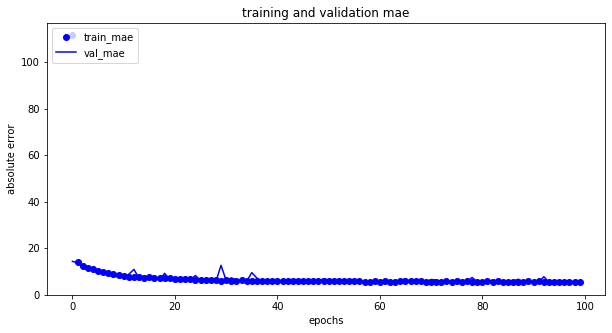

In [36]:
plt.figure(figsize = (10,5))
plt.plot(history.history['mae'],'bo')
plt.plot(history.history['val_mae'],'b')
plt.title('training and validation mae')
plt.xlabel('epochs')
plt.ylabel('absolute error')
plt.legend(['train_mae','val_mae'],loc= 'upper left')
plt.show()